# 1.5. Stochastic Gradient Descent
  
[確率的勾配降下法とは何か、をPythonで動かして解説する](https://qiita.com/kenmatsu4/items/d282054ddedbd68fecb0)  
  
[確率的勾配降下法のメリットについて考えてみた](https://qiita.com/koshian2/items/028c457880c0ec576e27)  
  
[機械学習をやる上で知っておきたい連続最適化](https://qiita.com/hiyoko9t/items/6742e7dc121cf4cbef09)  
  
**Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.** Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.  
  
**SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing.**  
  
The advantages of Stochastic Gradient Descent are:  
  
- Efficiency.
- Ease of implementation (lots of opportunities for code tuning).
  
The disadvantages of Stochastic Gradient Descent include:  
  
- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- SGD is sensitive to feature scaling.

  

## 1.5.1 Classification
  
#### Warning
  
***Make sure you permute (shuffle) your training data before fitting the model or use `shuffle=True` to shuffle after each iteration.*** 
  
The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification.  
  
As other classifiers, SGD has to be fitted with two arrays: an array X of size [n_samples, n_features] holding the training samples, and an array Y of size [n_samples] holding the target values (class labels) for the training samples: 

In [1]:
from sklearn.linear_model import SGDClassifier
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = SGDClassifier(loss='hinge', penalty='l2')
clf.fit(X, y)

/home/tk/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [2]:
clf.predict([[2, 2]])

array([1])

SGD fits a linear model to the training data. The member `coef_` holds the model parameters:

In [3]:
clf.coef_

array([[9.91080278, 9.91080278]])

Whether or not the model should use an intercept, i.e. a biased hyperplane, is contorolled by the parameter `fit_intercept`.  
To get the signed distance to the hyperplane use `SGDClassifier.decision_function`:

In [4]:
clf.decision_function([[2, 2]])

array([29.67316119])

The concrete loss function can be set via the loss parameter. SGDClassifier supports the following loss functions:  
  
- `loss="hinge"`: (soft-margin) linear Support Vector Machine,
- `loss="modified_huber"`: smoothed hinge loss,
- `loss="log"`: logistic regression,
- and all regression losses below.
  
The first two loss functions are lazy, they only update the model parameters if an example violates the margin constraint, which makes training very efficient and may result in sparser models, even when L2 penalty is used.  
  
Using `loss="log"` or `loss="modified_huber"` enables the predict_proba method, which gives a vector of probability estimates $P(y|x)$ per sample $x$:  


In [5]:
clf = SGDClassifier(loss="log").fit(X, y)
clf.predict_proba([[1., 1.]])

/home/tk/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([[4.97248476e-07, 9.99999503e-01]])

The concrete penalty can be set via the penalty parameter. SGD supports the following penalties:  
  
- `penalty="l2"`: L2 norm penalty on `coef_`.
- `penalty="l1"`: L1 norm penalty on `coef_`.
- `penalty="elasticnet"`: Convex combination of L2 and L1;  
  `(1 - l1_ratio) * L2 + l1_ratio * L1`.
  
The default setting is `penalty="l2"`. The L1 penalty leads to sparse solutions, driving most coefficients to zero. The Elastic Net solves some deficiencies of the L1 penalty in the presence of highly correlated attributes. The parameter `l1_ratio` controls the convex combination of L1 and L2 penalty.  
  
SGDClassifier supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme. For each of the $K$ classes, a binary classifier is learned that discriminates between that and all other $K-1$ classes. At testing time, we compute the confidence score (i.e. the signed distances to the hyperplane) for each classifier and choose the class with the highest confidence. The Figure below illustrates the OVA approach on the iris dataset. The dashed lines represent the three OVA classifiers; the background colors show the decision surface induced by the three classifiers.

Automatically created module for IPython interactive environment


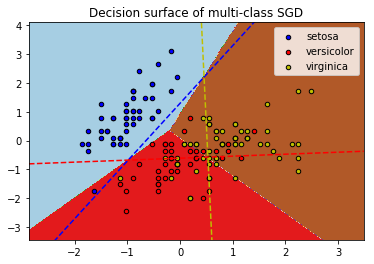

In [6]:
%matplotlib inline


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

SGDClassifier supports both weighted classes and weighted instances via the fit parameters `class_weight` and `sample_weight`.  
  
SGDClassifier supports averaged SGD (ASGD). Averaging can be enabled by setting `average=True`. ASGD works by averaging the coefficients of the plain SGD over each iteration over a sample. When using ASGD the learning rate can be larger and even constant leading on some datasets to a speed up in training time.  
  
For classification with a logistic loss, another variant of SGD with an averaging strategy is available with Stochastic Average Gradient (SAG) algorithm, available as a solver in LogisticRegression.  

## 1.5.2. Regression
  
The class SGDRegressor implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties to fit linear regression models. **SGDRegressor is well suited for regression problems with a large number of training samples (> 10.000), for other problems we recommend Ridge, Lasso, or ElasticNet.**  
  
The concrete loss function can be set via the loss parameter. SGDRegressor supports the following loss functions:  
  
- loss="squared_loss": Ordinary least squares,
- loss="huber": Huber loss for robust regression,
- loss="epsilon_insensitive": linear Support Vector Regression.
  
The Huber and epsilon-insensitive loss functions can be used for robust regression. The width of the insensitive region has to be specified via the parameter `epsilon`. This parameter depends on the scale of the target variables.  
  
SGDRegressor supports averaged SGD as SGDClassifier. Averaging can be enabled by setting `average=True`.  
  
For regression with a squared loss and a l2 penalty, another variant of SGD with an averaging strategy is available with Stochastic Average Gradient (SAG) algorithm, available as a solver in Ridge.  

## 1.5.3. Stochastic Gradient Descent for sparse data

#### Note
  
**The sparse implementation produces slightly different results than the dense implementation due to a shrunk learning rate for the intercept.**  
  
There is built-in support for sparse data given in any matrix in a format supported by `scipy.sparse`. For maximum efficiency, however, use the CSR matrix format as defined in `scipy.sparse.csr_matrix`.  
  
Example: [Classification of text documents using sparse features](http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#sphx-glr-auto-examples-text-document-classification-20newsgroups-py)  

## 1.5.4. Complexity
  
**The major advantage of SGD is its efficiency, which is basically linear in the number of training examples.** If X is a matrix of size (n, p) training has a cost of $O(k n \bar p)$, where $k$ is the number of iterations (epochs) and $\bar p$ is the average number of non-zero attributes per sample.

Recent theoretical results, however, show that the runtime to get some desired optimization accuracy does not increase as the training set size increases.  
  

## 1.5.5. Tips on Practical Use
  


- Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. This can be easily done using StandardScaler:

In [ ]:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaler.fit(X_train)  # Don't cheat - fit only on training data
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)  # apply same transformation to test data

- If your attributes have an intrinsic scale (e.g. word frequencies or indicator features) scaling is not needed.
  
  
- Finding a reasonable regularization term \alpha is best done using GridSearchCV, usually in the range 10.0**-np.arange(1,7).
  
  
- Empirically, we found that SGD converges after observing approx. 10^6 training samples. Thus, a reasonable first guess for the number of iterations is `n_iter = np.ceil(10**6 / n)`, where `n` is the size of the training set.
  
  
- If you apply SGD to features extracted using PCA we found that it is often wise to scale the feature values by some constant c such that the average L2 norm of the training data equals one.
  
  
- We found that Averaged SGD works best with a larger number of features and a higher eta0

## [1.5.6. Mathematical formulation](http://scikit-learn.org/stable/modules/sgd.html#mathematical-formulation)

[確率的勾配法あれこれまとめ](https://qiita.com/tkazusa/items/4562cc7080105d5c78a9)  

## [1.5.7. Implementation details](http://scikit-learn.org/stable/modules/sgd.html#implementation-details)